# Using LSTM

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,GRU,GlobalAveragePooling3D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("/content/HDFCBANK.NS.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-30,593.500000,597.500000,589.049988,589.875000,572.680298,1907266.0
1,2016-05-31,592.950012,592.950012,588.700012,590.950012,573.723999,2757820.0
2,2016-06-01,591.474976,591.474976,585.500000,587.575012,570.447449,2837816.0
3,2016-06-02,587.349976,590.299988,585.500000,587.474976,570.350220,3955308.0
4,2016-06-03,590.049988,592.500000,584.525024,585.875000,568.796936,2262210.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1228,2021-05-21,1443.000000,1501.900024,1443.000000,1497.300049,1497.300049,9670823.0
1229,2021-05-24,1503.250000,1520.449951,1498.500000,1509.949951,1509.949951,11073051.0
1230,2021-05-25,1510.500000,1513.750000,1470.500000,1478.949951,1478.949951,9618487.0
1231,2021-05-26,1480.000000,1487.000000,1470.000000,1477.050049,1477.050049,6141995.0
1232,2021-05-27,1473.099976,1489.000000,1462.449951,1482.650024,1482.650024,10219748.0


In [6]:
# The wrong thing

series=df["Close"].values.reshape(-1,1)



In [7]:
series.shape

(1233, 1)

In [8]:
#Normalising
scaler=StandardScaler()
scaler.fit(series[:len(series)//2]) #Find appropriate test boundary by hyper parameter optimization
series=scaler.transform(series).flatten()



In [9]:
series.shape

(1233,)

In [10]:
T=10
D=1
X=[]
y=[]
for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[t+T])
X=np.array(X).reshape(-1,T,1)
y=np.array(y)
N=len(X)
print("X.shape ",X.shape,"y.shape",y.shape)

X.shape  (1223, 10, 1) y.shape (1223,)


In [12]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss="mse",optimizer=Adam(lr=0.01))

history=model.fit(X[:-N//2],y[:-N//2],epochs=80,validation_data=(X[-N//2:],y[-N//2:]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 3s 33ms/step - loss: 0.1055 - val_loss: nan
Epoch 2/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0172 - val_loss: nan
Epoch 3/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0137 - val_loss: nan
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: nan
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: nan
Epoch 6/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0071 - val_loss: nan
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: nan
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: nan
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: nan
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0050 - val_loss: nan
Epoch 11/80
20/20 [=============================

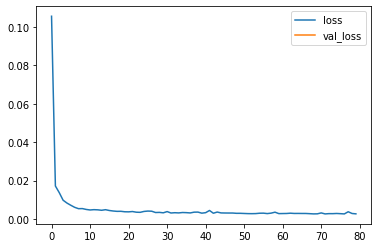

In [13]:
pd.DataFrame(history.history).plot()

(1223, 1)


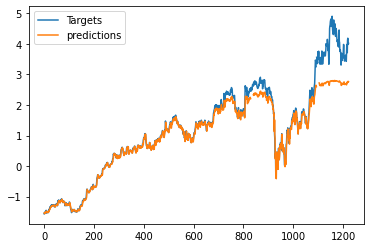

In [14]:
# one step forecast
output=model.predict(X)
print(output.shape)
predictions=output[:,0]
plt.plot(y,label="Targets")
plt.plot(predictions,label="predictions")
plt.legend()
plt.show()

In [15]:
#Multistep forecast
validation_target=y[-N//2:]
validation_predictions=[]
last_x=X[-N//2]
while len(validation_predictions)<len(validation_target):
  validation_predictions.append(model.predict(last_x.reshape(-1,T,1))[0,0])
  last_x=np.roll(last_x,-1)
  last_x[-1]=model.predict(last_x.reshape(-1,T,1))[0,0]


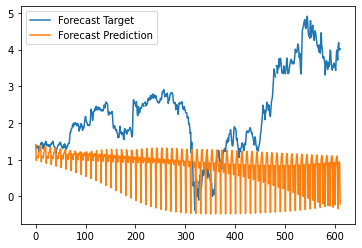

In [16]:
plt.plot(validation_target,label="Forecast Target")
plt.plot(validation_predictions,label="Forecast Prediction")
plt.legend()

In [17]:
## model doesnt predict the new values. This model isn't doing much

In [18]:
# stock return are calculated not prices

In [19]:
df["Prev_Close"]=df["Close"].shift(1)

In [20]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
0,2016-05-30,593.500000,597.500000,589.049988,589.875000,572.680298,1907266.0,NaN
1,2016-05-31,592.950012,592.950012,588.700012,590.950012,573.723999,2757820.0,589.875000
2,2016-06-01,591.474976,591.474976,585.500000,587.575012,570.447449,2837816.0,590.950012
3,2016-06-02,587.349976,590.299988,585.500000,587.474976,570.350220,3955308.0,587.575012
4,2016-06-03,590.049988,592.500000,584.525024,585.875000,568.796936,2262210.0,587.474976


In [21]:
df["Return"]=(df["Close"]-df["Prev_Close"])/df['Prev_Close']

In [22]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close,Return
0,2016-05-30,593.500000,597.500000,589.049988,589.875000,572.680298,1907266.0,NaN,NaN
1,2016-05-31,592.950012,592.950012,588.700012,590.950012,573.723999,2757820.0,589.875000,0.001822
2,2016-06-01,591.474976,591.474976,585.500000,587.575012,570.447449,2837816.0,590.950012,-0.005711
3,2016-06-02,587.349976,590.299988,585.500000,587.474976,570.350220,3955308.0,587.575012,-0.000170
4,2016-06-03,590.049988,592.500000,584.525024,585.875000,568.796936,2262210.0,587.474976,-0.002723


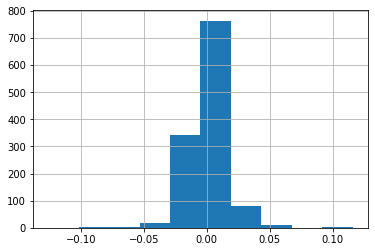

In [23]:
df["Return"].hist()

In [24]:
series=df['Return'].values[1:].reshape(-1,1)
scaler=StandardScaler()
series=scaler.fit_transform(series).flatten()

In [25]:
series[:10]

array([ 0.06330458, -0.41949407, -0.0643995 , -0.2280261 , -0.08904025,
        0.08879   , -0.65956792, -0.22988016,  0.05429552, -0.51977812])

In [26]:
series=df['Return'].values[1:].reshape(-1,1)
scaler.fit(series[:len(series)//2])
series=scaler.transform(series).flatten()

In [27]:
series

array([ 0.09466161, -0.71396287, -0.11922599, ..., -2.304611  ,
       -0.23883869,  0.30599363])

In [28]:
T=10
D=1
X=[]
y=[]
for t in range(len(series)-T):
  X.append(series[t:t+T])
  y.append(series[t+T])
X=np.array(X).reshape(-1,T,1)
y=np.array(y)
N=len(X)
print("X.shape ",X.shape,"y.shape",y.shape)

X.shape  (1222, 10, 1) y.shape (1222,)


In [29]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss="mse",optimizer=Adam(lr=0.01))

history=model.fit(X[:-N//2],y[:-N//2],epochs=80,validation_data=(X[-N//2:],y[-N//2:]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/80
20/20 [==============================] - 3s 32ms/step - loss: 1.0244 - val_loss: nan
Epoch 2/80
20/20 [==============================] - 0s 10ms/step - loss: 1.0193 - val_loss: nan
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 1.0135 - val_loss: nan
Epoch 4/80
20/20 [==============================] - 0s 10ms/step - loss: 1.0128 - val_loss: nan
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 1.0143 - val_loss: nan
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 1.0115 - val_loss: nan
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 1.0095 - val_loss: nan
Epoch 8/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0148 - val_loss: nan
Epoch 9/80
20/20 [==============================] - 0s 7ms/step - loss: 1.0210 - val_loss: nan
Epoch 10/80
20/20 [==============================] - 0s 8ms/step - loss: 1.0080 - val_loss: nan
Epoch 11/80
20/20 [===========================

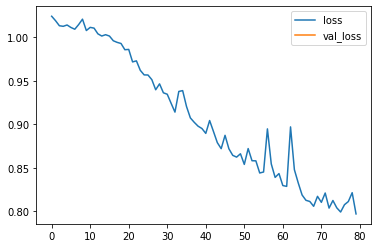

In [30]:
pd.DataFrame(history.history).plot()

(1222, 1)


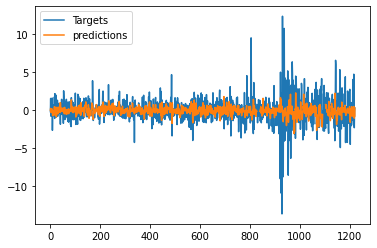

In [31]:
# one step forecast
output=model.predict(X)
print(output.shape)
predictions=output[:,0]
plt.plot(y,label="Targets")
plt.plot(predictions,label="predictions")
plt.legend()
plt.show()

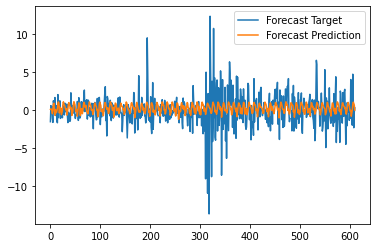

In [32]:
#Multistep forecast
validation_target=y[-N//2:]
validation_predictions=[]
last_x=X[-N//2]
while len(validation_predictions)<len(validation_target):
  validation_predictions.append(model.predict(last_x.reshape(-1,T,1))[0,0])
  last_x=np.roll(last_x,-1)
  last_x[-1]=model.predict(last_x.reshape(-1,T,1))[0,0]
plt.plot(validation_target,label="Forecast Target")
plt.plot(validation_predictions,label="Forecast Prediction")
plt.legend()

In [33]:
#Binary classification whether it will go up or down 
# Regression is harder than classification


In [34]:
data=df[['Open','High','Low','Close','Volume']].values
target=df['Return'].values

In [35]:
data.shape

(1233, 5)

In [36]:
T=10
D=data.shape[1]
N=len(data)-T# if T=10 for 11 poinnts then there is only 1 sample

In [37]:
Ntrain=len(data)*2//3
scaler=StandardScaler()
scaler.fit(data[:Ntrain+T])
data=scaler.transform(data)

In [38]:
X_train=np.zeros((Ntrain,T,D))
y_train=np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t,:,:]=data[t:t+T]
  y_train[t]=(target[t+T]>0)

In [39]:
X_test=np.zeros((N-Ntrain,T,D))
y_test=np.zeros(N-Ntrain)

for u in range(N-Ntrain):
  t=u+Ntrain
  X_test[u,:,:]=data[t:t+T]
  y_test[u]=(target[t+T]>0)

In [40]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation="sigmoid")(x)
model=Model(i,x)
model.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [41]:
history=model.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=300)

Epoch 1/300
26/26 [==============================] - 3s 30ms/step - loss: 0.6953 - accuracy: 0.5097 - val_loss: nan - val_accuracy: 0.5212
Epoch 2/300
26/26 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5231 - val_loss: nan - val_accuracy: 0.4888
Epoch 3/300
26/26 [==============================] - 0s 8ms/step - loss: 0.6908 - accuracy: 0.5195 - val_loss: nan - val_accuracy: 0.5212
Epoch 4/300
26/26 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.5292 - val_loss: nan - val_accuracy: 0.5212
Epoch 5/300
26/26 [==============================] - 0s 9ms/step - loss: 0.6901 - accuracy: 0.5328 - val_loss: nan - val_accuracy: 0.5087
Epoch 6/300
26/26 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.5414 - val_loss: nan - val_accuracy: 0.5112
Epoch 7/300
26/26 [==============================] - 0s 8ms/step - loss: 0.6878 - accuracy: 0.5389 - val_loss: nan - val_accuracy: 0.5112
Epoch 8/300
26/26 [==============

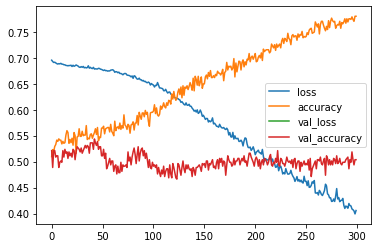

In [42]:
pd.DataFrame(history.history).plot()

# Conclusion

* we cannot do even binary prediction ... Regression is far difficult..Hence it's very difficult to predict the stock price
* for binary classification 50% accuracy is the worst 
* Once might still work with making prediction with one step forecast
* Stock prices closely follows a random walk, hence naive forecast is the best
* Once might try to predict muliple output at once

In [43]:
X_train=np.zeros((Ntrain,T,D))
y_train=np.zeros((Ntrain,T))

for t in range(Ntrain):
  X_train[t,:,:]=data[t:t+T]
  y_train[t,:]=(target[t:t+T]>0)

In [44]:
X_test=np.zeros((N-Ntrain,T,D))
y_test=np.zeros((N-Ntrain,T))

for u in range(N-Ntrain):
  t=u+Ntrain
  X_test[u,:,:]=data[t:t+T]
  y_test[u]=(target[t:t+T]>0)

In [45]:
model=tf.keras.Sequential([
                           Input(shape=(T,D)),
                           LSTM(32,return_sequences=True),
                           LSTM(16),
                           Dense(10,activation="sigmoid")
])

model.compile(loss="binary_crossentropy",optimizer=Adam(lr=0.001),metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [48]:
class CustomSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):  # or save after some epoch, each k-th epoch etc.
            self.model.save("model_{}.hd5".format(epoch))

In [49]:
history=model.fit(X_train,y_train,batch_size=16,validation_data=(X_test,y_test),epochs=100,callbacks=[CustomSaver()])

Epoch 1/100
52/52 [==============================] - 4s 30ms/step - loss: 0.6922 - accuracy: 0.1277 - val_loss: nan - val_accuracy: 0.4713


INFO:tensorflow:Assets written to: model_0.hd5/assets


INFO:tensorflow:Assets written to: model_0.hd5/assets


Epoch 2/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6918 - accuracy: 0.2202 - val_loss: nan - val_accuracy: 0.5037
Epoch 3/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6911 - accuracy: 0.1800 - val_loss: nan - val_accuracy: 0.3641
Epoch 4/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6909 - accuracy: 0.1290 - val_loss: nan - val_accuracy: 0.1995
Epoch 5/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6899 - accuracy: 0.1934 - val_loss: nan - val_accuracy: 0.5037
Epoch 6/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6892 - accuracy: 0.0791 - val_loss: nan - val_accuracy: 0.1895


INFO:tensorflow:Assets written to: model_5.hd5/assets


INFO:tensorflow:Assets written to: model_5.hd5/assets


Epoch 7/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6882 - accuracy: 0.1679 - val_loss: nan - val_accuracy: 0.2918
Epoch 8/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6874 - accuracy: 0.1095 - val_loss: nan - val_accuracy: 0.3865
Epoch 9/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6866 - accuracy: 0.1959 - val_loss: nan - val_accuracy: 0.1870
Epoch 10/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6868 - accuracy: 0.1180 - val_loss: nan - val_accuracy: 0.2494
Epoch 11/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6861 - accuracy: 0.1314 - val_loss: nan - val_accuracy: 0.1995


INFO:tensorflow:Assets written to: model_10.hd5/assets


INFO:tensorflow:Assets written to: model_10.hd5/assets


Epoch 12/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6859 - accuracy: 0.1472 - val_loss: nan - val_accuracy: 0.1022
Epoch 13/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6852 - accuracy: 0.1180 - val_loss: nan - val_accuracy: 0.1771
Epoch 14/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6845 - accuracy: 0.1460 - val_loss: nan - val_accuracy: 0.1072
Epoch 15/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6843 - accuracy: 0.1387 - val_loss: nan - val_accuracy: 0.3142
Epoch 16/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6833 - accuracy: 0.1460 - val_loss: nan - val_accuracy: 0.1671


INFO:tensorflow:Assets written to: model_15.hd5/assets


INFO:tensorflow:Assets written to: model_15.hd5/assets


Epoch 17/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6831 - accuracy: 0.1156 - val_loss: nan - val_accuracy: 0.1771
Epoch 18/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6828 - accuracy: 0.1253 - val_loss: nan - val_accuracy: 0.1771
Epoch 19/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6832 - accuracy: 0.0815 - val_loss: nan - val_accuracy: 0.2444
Epoch 20/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6815 - accuracy: 0.0827 - val_loss: nan - val_accuracy: 0.2219
Epoch 21/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6815 - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.1895


INFO:tensorflow:Assets written to: model_20.hd5/assets


INFO:tensorflow:Assets written to: model_20.hd5/assets


Epoch 22/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6803 - accuracy: 0.1119 - val_loss: nan - val_accuracy: 0.2893
Epoch 23/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6796 - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.3840
Epoch 24/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6791 - accuracy: 0.1083 - val_loss: nan - val_accuracy: 0.2394
Epoch 25/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6771 - accuracy: 0.0681 - val_loss: nan - val_accuracy: 0.1471
Epoch 26/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6761 - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1521


INFO:tensorflow:Assets written to: model_25.hd5/assets


INFO:tensorflow:Assets written to: model_25.hd5/assets


Epoch 27/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6745 - accuracy: 0.0693 - val_loss: nan - val_accuracy: 0.1920
Epoch 28/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6720 - accuracy: 0.0937 - val_loss: nan - val_accuracy: 0.2020
Epoch 29/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6705 - accuracy: 0.0949 - val_loss: nan - val_accuracy: 0.0574
Epoch 30/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6696 - accuracy: 0.0754 - val_loss: nan - val_accuracy: 0.1970
Epoch 31/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6658 - accuracy: 0.1034 - val_loss: nan - val_accuracy: 0.1197


INFO:tensorflow:Assets written to: model_30.hd5/assets


INFO:tensorflow:Assets written to: model_30.hd5/assets


Epoch 32/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6635 - accuracy: 0.0754 - val_loss: nan - val_accuracy: 0.1397
Epoch 33/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6590 - accuracy: 0.1034 - val_loss: nan - val_accuracy: 0.1097
Epoch 34/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6569 - accuracy: 0.1144 - val_loss: nan - val_accuracy: 0.1421
Epoch 35/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6544 - accuracy: 0.1472 - val_loss: nan - val_accuracy: 0.1796
Epoch 36/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6507 - accuracy: 0.1277 - val_loss: nan - val_accuracy: 0.1272


INFO:tensorflow:Assets written to: model_35.hd5/assets


INFO:tensorflow:Assets written to: model_35.hd5/assets


Epoch 37/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6459 - accuracy: 0.1168 - val_loss: nan - val_accuracy: 0.1322
Epoch 38/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6438 - accuracy: 0.1192 - val_loss: nan - val_accuracy: 0.1322
Epoch 39/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6407 - accuracy: 0.1265 - val_loss: nan - val_accuracy: 0.1372
Epoch 40/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6370 - accuracy: 0.1192 - val_loss: nan - val_accuracy: 0.0973
Epoch 41/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6390 - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.1047


INFO:tensorflow:Assets written to: model_40.hd5/assets


INFO:tensorflow:Assets written to: model_40.hd5/assets


Epoch 42/100
52/52 [==============================] - 1s 14ms/step - loss: 0.6359 - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.0923
Epoch 43/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6335 - accuracy: 0.0803 - val_loss: nan - val_accuracy: 0.0948
Epoch 44/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6317 - accuracy: 0.1131 - val_loss: nan - val_accuracy: 0.1022
Epoch 45/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6315 - accuracy: 0.1071 - val_loss: nan - val_accuracy: 0.1072
Epoch 46/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6305 - accuracy: 0.1022 - val_loss: nan - val_accuracy: 0.0748


INFO:tensorflow:Assets written to: model_45.hd5/assets


INFO:tensorflow:Assets written to: model_45.hd5/assets


Epoch 47/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6298 - accuracy: 0.0937 - val_loss: nan - val_accuracy: 0.1022
Epoch 48/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6272 - accuracy: 0.0937 - val_loss: nan - val_accuracy: 0.0873
Epoch 49/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6297 - accuracy: 0.0669 - val_loss: nan - val_accuracy: 0.0973
Epoch 50/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6294 - accuracy: 0.1095 - val_loss: nan - val_accuracy: 0.0698
Epoch 51/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6269 - accuracy: 0.0876 - val_loss: nan - val_accuracy: 0.0723


INFO:tensorflow:Assets written to: model_50.hd5/assets


INFO:tensorflow:Assets written to: model_50.hd5/assets


Epoch 52/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6261 - accuracy: 0.0912 - val_loss: nan - val_accuracy: 0.0948
Epoch 53/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6254 - accuracy: 0.0925 - val_loss: nan - val_accuracy: 0.0848
Epoch 54/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6242 - accuracy: 0.1034 - val_loss: nan - val_accuracy: 0.0623
Epoch 55/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6220 - accuracy: 0.0827 - val_loss: nan - val_accuracy: 0.0873
Epoch 56/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6220 - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0748


INFO:tensorflow:Assets written to: model_55.hd5/assets


INFO:tensorflow:Assets written to: model_55.hd5/assets


Epoch 57/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6216 - accuracy: 0.0803 - val_loss: nan - val_accuracy: 0.0898
Epoch 58/100
52/52 [==============================] - 1s 11ms/step - loss: 0.6216 - accuracy: 0.0718 - val_loss: nan - val_accuracy: 0.0848
Epoch 59/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6198 - accuracy: 0.1058 - val_loss: nan - val_accuracy: 0.0798
Epoch 60/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6213 - accuracy: 0.0718 - val_loss: nan - val_accuracy: 0.0623
Epoch 61/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6193 - accuracy: 0.0876 - val_loss: nan - val_accuracy: 0.0673


INFO:tensorflow:Assets written to: model_60.hd5/assets


INFO:tensorflow:Assets written to: model_60.hd5/assets


Epoch 62/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6189 - accuracy: 0.0779 - val_loss: nan - val_accuracy: 0.0773
Epoch 63/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6174 - accuracy: 0.0852 - val_loss: nan - val_accuracy: 0.0648
Epoch 64/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6135 - accuracy: 0.0839 - val_loss: nan - val_accuracy: 0.0773
Epoch 65/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6169 - accuracy: 0.0852 - val_loss: nan - val_accuracy: 0.0898
Epoch 66/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6140 - accuracy: 0.0876 - val_loss: nan - val_accuracy: 0.0948


INFO:tensorflow:Assets written to: model_65.hd5/assets


INFO:tensorflow:Assets written to: model_65.hd5/assets


Epoch 67/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6157 - accuracy: 0.0791 - val_loss: nan - val_accuracy: 0.0848
Epoch 68/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6126 - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.0798
Epoch 69/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6138 - accuracy: 0.0791 - val_loss: nan - val_accuracy: 0.0673
Epoch 70/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6115 - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.0648
Epoch 71/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6123 - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0748


INFO:tensorflow:Assets written to: model_70.hd5/assets


INFO:tensorflow:Assets written to: model_70.hd5/assets


Epoch 72/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6111 - accuracy: 0.0839 - val_loss: nan - val_accuracy: 0.0773
Epoch 73/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6121 - accuracy: 0.0937 - val_loss: nan - val_accuracy: 0.0848
Epoch 74/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6119 - accuracy: 0.0803 - val_loss: nan - val_accuracy: 0.0773
Epoch 75/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6100 - accuracy: 0.0912 - val_loss: nan - val_accuracy: 0.0773
Epoch 76/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6064 - accuracy: 0.0864 - val_loss: nan - val_accuracy: 0.0823


INFO:tensorflow:Assets written to: model_75.hd5/assets


INFO:tensorflow:Assets written to: model_75.hd5/assets


Epoch 77/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6109 - accuracy: 0.0912 - val_loss: nan - val_accuracy: 0.0723
Epoch 78/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6062 - accuracy: 0.0876 - val_loss: nan - val_accuracy: 0.0723
Epoch 79/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6067 - accuracy: 0.0876 - val_loss: nan - val_accuracy: 0.0798
Epoch 80/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6041 - accuracy: 0.0645 - val_loss: nan - val_accuracy: 0.0698
Epoch 81/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6047 - accuracy: 0.0864 - val_loss: nan - val_accuracy: 0.0748


INFO:tensorflow:Assets written to: model_80.hd5/assets


INFO:tensorflow:Assets written to: model_80.hd5/assets


Epoch 82/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6041 - accuracy: 0.0718 - val_loss: nan - val_accuracy: 0.0623
Epoch 83/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6033 - accuracy: 0.0852 - val_loss: nan - val_accuracy: 0.0723
Epoch 84/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6038 - accuracy: 0.1022 - val_loss: nan - val_accuracy: 0.0648
Epoch 85/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6023 - accuracy: 0.0839 - val_loss: nan - val_accuracy: 0.0798
Epoch 86/100
52/52 [==============================] - 1s 12ms/step - loss: 0.6021 - accuracy: 0.0961 - val_loss: nan - val_accuracy: 0.0673


INFO:tensorflow:Assets written to: model_85.hd5/assets


INFO:tensorflow:Assets written to: model_85.hd5/assets


Epoch 87/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5994 - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.0599
Epoch 88/100
52/52 [==============================] - 1s 13ms/step - loss: 0.5991 - accuracy: 0.0766 - val_loss: nan - val_accuracy: 0.0648
Epoch 89/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5978 - accuracy: 0.0900 - val_loss: nan - val_accuracy: 0.0723
Epoch 90/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5985 - accuracy: 0.0900 - val_loss: nan - val_accuracy: 0.0648
Epoch 91/100
52/52 [==============================] - 1s 13ms/step - loss: 0.5976 - accuracy: 0.0961 - val_loss: nan - val_accuracy: 0.0648


INFO:tensorflow:Assets written to: model_90.hd5/assets


INFO:tensorflow:Assets written to: model_90.hd5/assets


Epoch 92/100
52/52 [==============================] - 1s 13ms/step - loss: 0.5973 - accuracy: 0.0852 - val_loss: nan - val_accuracy: 0.0673
Epoch 93/100
52/52 [==============================] - 1s 13ms/step - loss: 0.6013 - accuracy: 0.0912 - val_loss: nan - val_accuracy: 0.0723
Epoch 94/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5969 - accuracy: 0.0973 - val_loss: nan - val_accuracy: 0.0673
Epoch 95/100
52/52 [==============================] - 1s 13ms/step - loss: 0.5957 - accuracy: 0.0852 - val_loss: nan - val_accuracy: 0.0574
Epoch 96/100
52/52 [==============================] - 1s 13ms/step - loss: 0.5945 - accuracy: 0.0815 - val_loss: nan - val_accuracy: 0.0623


INFO:tensorflow:Assets written to: model_95.hd5/assets


INFO:tensorflow:Assets written to: model_95.hd5/assets


Epoch 97/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5943 - accuracy: 0.0827 - val_loss: nan - val_accuracy: 0.0623
Epoch 98/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5927 - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.0673
Epoch 99/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5906 - accuracy: 0.0961 - val_loss: nan - val_accuracy: 0.0599
Epoch 100/100
52/52 [==============================] - 1s 12ms/step - loss: 0.5911 - accuracy: 0.0900 - val_loss: nan - val_accuracy: 0.0599


In [51]:
final_model=tf.keras.models.load_model("/content/model_80.hd5")

In [57]:
scaler.inverse_transform(X_train).shape

(822, 10, 5)

In [64]:
df[-15:]

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close,Return
1218,2021-05-06,1407.599976,1410.800049,1395.000000,1400.900024,1400.900024,5738522.0,1402.599976,-0.001212
1219,2021-05-07,1412.949951,1424.949951,1410.250000,1414.750000,1414.750000,6024167.0,1400.900024,0.009886
1220,2021-05-10,1427.000000,1430.000000,1412.800049,1419.849976,1419.849976,5530025.0,1414.750000,0.003605
1221,2021-05-11,1396.000000,1424.199951,1395.050049,1403.550049,1403.550049,7259517.0,1419.849976,-0.011480
1222,2021-05-12,1399.750000,1408.599976,1388.849976,1399.500000,1399.500000,6887463.0,1403.550049,-0.002886
1223,2021-05-14,1394.349976,1398.900024,1382.349976,1386.849976,1386.849976,5302071.0,1399.500000,-0.009039
1224,2021-05-17,1395.150024,1442.599976,1381.300049,1440.250000,1440.250000,7560346.0,1386.849976,0.038505
1225,2021-05-18,1458.949951,1482.750000,1455.000000,1476.699951,1476.699951,11082640.0,1440.250000,0.025308
1226,2021-05-19,1470.199951,1478.849976,1452.550049,1458.199951,1458.199951,5065458.0,1476.699951,-0.012528
1227,2021-05-20,1458.349976,1465.900024,1428.500000,1432.800049,1432.800049,5342092.0,1458.199951,-0.017419


In [66]:
scaler.inverse_transform(X_test)[-1]

array([[1.39975000e+03, 1.40859998e+03, 1.38884998e+03, 1.39950000e+03,
        6.88746300e+06],
       [1.39434998e+03, 1.39890002e+03, 1.38234998e+03, 1.38684998e+03,
        5.30207100e+06],
       [1.39515002e+03, 1.44259998e+03, 1.38130005e+03, 1.44025000e+03,
        7.56034600e+06],
       [1.45894995e+03, 1.48275000e+03, 1.45500000e+03, 1.47669995e+03,
        1.10826400e+07],
       [1.47019995e+03, 1.47884998e+03, 1.45255005e+03, 1.45819995e+03,
        5.06545800e+06],
       [1.45834998e+03, 1.46590002e+03, 1.42850000e+03, 1.43280005e+03,
        5.34209200e+06],
       [1.44300000e+03, 1.50190002e+03, 1.44300000e+03, 1.49730005e+03,
        9.67082300e+06],
       [1.50325000e+03, 1.52044995e+03, 1.49850000e+03, 1.50994995e+03,
        1.10730510e+07],
       [1.51050000e+03, 1.51375000e+03, 1.47050000e+03, 1.47894995e+03,
        9.61848700e+06],
       [1.48000000e+03, 1.48700000e+03, 1.47000000e+03, 1.47705005e+03,
        6.14199500e+06]])

In [70]:
y_next10=1-final_model.predict(X_test[-1].reshape(-1,T,D))

In [86]:
y_next=[i for i in y_next10[0]  ]#m= [thing for thing in list_of_things]

In [88]:
for i in range(len(y_next)):#value_when_true if condition else value_when_false
  y_next[i]=-y_next[i] if y_next[i]<0.5 else y_next[i]

In [89]:
y_next

[0.57986206,
 0.5216068,
 -0.39273155,
 -0.31666577,
 -0.2816686,
 -0.38758475,
 0.5125055,
 0.5752021,
 0.7514639,
 0.67692125]

In [91]:
np.mean(y_next)

0.22389106

In [92]:
np.round(y_next)

array([ 1.,  1., -0., -0., -0., -0.,  1.,  1.,  1.,  1.], dtype=float32)

In [114]:
np.round(1-final_model.predict(X_test))[-1]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 1.], dtype=float32)

In [115]:
y_test[-1]

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0.])